<a href="https://colab.research.google.com/github/Sina-Khan/EURUSD_Up-Down_RSI_Analysis/blob/main/EURUSD_UP_DOWN_RSI_20230307.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
files.upload()

Saving EURUSD_Daily_20060102_20230131.csv to EURUSD_Daily_20060102_20230131 (1).csv


{'EURUSD_Daily_20060102_20230131.csv': b'DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL\r\n2006.01.02,1.1849,1.1869,1.1801,1.1821,5870\r\n2006.01.03,1.1822,1.2033,1.181,1.2015,9455\r\n2006.01.04,1.2014,1.2146,1.2012,1.2108,10123\r\n2006.01.05,1.2107,1.2123,1.2065,1.2097,9584\r\n2006.01.06,1.2101,1.2182,1.2078,1.2143,9219\r\n2006.01.09,1.2143,1.2155,1.2051,1.2081,9512\r\n2006.01.10,1.208,1.2112,1.2036,1.2061,9977\r\n2006.01.11,1.2061,1.2146,1.2043,1.2141,9534\r\n2006.01.12,1.2139,1.2165,1.2007,1.2033,9787\r\n2006.01.13,1.2032,1.215,1.2028,1.2115,9358\r\n2006.01.16,1.2153,1.2176,1.2104,1.2116,8758\r\n2006.01.17,1.2115,1.2145,1.205,1.2117,9573\r\n2006.01.18,1.2114,1.2161,1.2069,1.2119,9745\r\n2006.01.19,1.2116,1.2127,1.2053,1.2091,9413\r\n2006.01.20,1.2091,1.2143,1.204,1.2136,9066\r\n2006.01.23,1.2143,1.2314,1.2141,1.2297,10429\r\n2006.01.24,1.2296,1.2323,1.2256,1.2269,9694\r\n2006.01.25,1.227,1.2324,1.2234,1.2242,10122\r\n2006.01.26,1.2243,1.2273,1.2198,1.2202,9953\r\n2006.01.27,1.2206,1.2238,1.2086,1

In [ ]:
df = pd.read_csv('EURUSD_Daily_20060102_20230131.csv')
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL
0,2006.01.02,1.18490,1.18690,1.18010,1.18210,5870
1,2006.01.03,1.18220,1.20330,1.18100,1.20150,9455
2,2006.01.04,1.20140,1.21460,1.20120,1.21080,10123
3,2006.01.05,1.21070,1.21230,1.20650,1.20970,9584
4,2006.01.06,1.21010,1.21820,1.20780,1.21430,9219
...,...,...,...,...,...,...
4431,2023.01.25,1.08856,1.09236,1.08574,1.09147,89198
4432,2023.01.26,1.09152,1.09294,1.08506,1.08917,84384
4433,2023.01.27,1.08909,1.09003,1.08378,1.08673,79737
4434,2023.01.30,1.08618,1.09138,1.08393,1.08500,84809


In [ ]:
# Create a function to calculate the Exponential Moving Average (EMA) Indicator
def EMA(data, period=20, column='CLOSE'):
  return data[column].ewm(span=period, adjust=False).mean()

In [ ]:
# Create a function to calculate the Relative Strength Index (RSI)
def RSI(data, period=14, column='CLOSE'):
  delta = data[column].diff(1)
  delta = delta.dropna()
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = EMA(data, period, column='up')
  AVG_Loss = abs(EMA(data, period, column='down'))
  RS = AVG_Gain / AVG_Loss
  RSI = 100 / (100 / (1 + RS))

  RSI['RSI' + str(period)] = RSI
  return data

In [ ]:
RSI(df, 7)
RSI(df, 14)
RSI(df, 20)
df['EMA15'] = EMA(df, 15)
df['EMA20'] = EMA(df, 20)
df['EMA50'] = EMA(df, 50)

df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,up,down,EMA15,EMA20,EMA50
0,2006.01.02,1.18490,1.18690,1.18010,1.18210,5870,NaN,NaN,1.182100,1.182100,1.182100
1,2006.01.03,1.18220,1.20330,1.18100,1.20150,9455,0.01940,0.00000,1.184525,1.183948,1.182861
2,2006.01.04,1.20140,1.21460,1.20120,1.21080,10123,0.00930,0.00000,1.187809,1.186505,1.183956
3,2006.01.05,1.21070,1.21230,1.20650,1.20970,9584,0.00000,-0.00110,1.190546,1.188714,1.184966
4,2006.01.06,1.21010,1.21820,1.20780,1.21430,9219,0.00460,0.00000,1.193515,1.191151,1.186116
...,...,...,...,...,...,...,...,...,...,...,...
4431,2023.01.25,1.08856,1.09236,1.08574,1.09147,89198,0.00268,0.00000,1.080071,1.076883,1.059446
4432,2023.01.26,1.09152,1.09294,1.08506,1.08917,84384,0.00000,-0.00230,1.081208,1.078053,1.060611
4433,2023.01.27,1.08909,1.09003,1.08378,1.08673,79737,0.00000,-0.00244,1.081898,1.078880,1.061635
4434,2023.01.30,1.08618,1.09138,1.08393,1.08500,84809,0.00000,-0.00173,1.082286,1.079463,1.062552


In [ ]:
# Create Target Column to determine if tomorrows price will be greater than todays price then put 1 else put 0
df['Target'] = np.where(df['CLOSE'].shift(-1) > df['CLOSE'], 1, 0)

In [ ]:
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,up,down,EMA15,EMA20,EMA50,Target
0,2006.01.02,1.18490,1.18690,1.18010,1.18210,5870,NaN,NaN,1.182100,1.182100,1.182100,1
1,2006.01.03,1.18220,1.20330,1.18100,1.20150,9455,0.01940,0.00000,1.184525,1.183948,1.182861,1
2,2006.01.04,1.20140,1.21460,1.20120,1.21080,10123,0.00930,0.00000,1.187809,1.186505,1.183956,0
3,2006.01.05,1.21070,1.21230,1.20650,1.20970,9584,0.00000,-0.00110,1.190546,1.188714,1.184966,1
4,2006.01.06,1.21010,1.21820,1.20780,1.21430,9219,0.00460,0.00000,1.193515,1.191151,1.186116,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4431,2023.01.25,1.08856,1.09236,1.08574,1.09147,89198,0.00268,0.00000,1.080071,1.076883,1.059446,0
4432,2023.01.26,1.09152,1.09294,1.08506,1.08917,84384,0.00000,-0.00230,1.081208,1.078053,1.060611,0
4433,2023.01.27,1.08909,1.09003,1.08378,1.08673,79737,0.00000,-0.00244,1.081898,1.078880,1.061635,0
4434,2023.01.30,1.08618,1.09138,1.08393,1.08500,84809,0.00000,-0.00173,1.082286,1.079463,1.062552,1


In [ ]:
# Remove the first Row of the Data
df = df[1:]
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,up,down,EMA15,EMA20,EMA50,Target
1,2006.01.03,1.18220,1.20330,1.18100,1.20150,9455,0.01940,0.00000,1.184525,1.183948,1.182861,1
2,2006.01.04,1.20140,1.21460,1.20120,1.21080,10123,0.00930,0.00000,1.187809,1.186505,1.183956,0
3,2006.01.05,1.21070,1.21230,1.20650,1.20970,9584,0.00000,-0.00110,1.190546,1.188714,1.184966,1
4,2006.01.06,1.21010,1.21820,1.20780,1.21430,9219,0.00460,0.00000,1.193515,1.191151,1.186116,0
5,2006.01.09,1.21430,1.21550,1.20510,1.20810,9512,0.00000,-0.00620,1.195338,1.192765,1.186978,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4431,2023.01.25,1.08856,1.09236,1.08574,1.09147,89198,0.00268,0.00000,1.080071,1.076883,1.059446,0
4432,2023.01.26,1.09152,1.09294,1.08506,1.08917,84384,0.00000,-0.00230,1.081208,1.078053,1.060611,0
4433,2023.01.27,1.08909,1.09003,1.08378,1.08673,79737,0.00000,-0.00244,1.081898,1.078880,1.061635,0
4434,2023.01.30,1.08618,1.09138,1.08393,1.08500,84809,0.00000,-0.00173,1.082286,1.079463,1.062552,1


In [ ]:
# Get a list of dataset to keep
keep_columns = df.drop(['DATE', 'HIGH', 'LOW', 'TICKVOL', 'CLOSE', 'up', 'down', 'Target', 'OPEN'], axis=1).columns
X = df[keep_columns].values
y = df['Target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1, criterion='entropy', random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=1)

In [ ]:
# How well the model
forest.score(X_test, y_test)

0.5107102593010147

In [ ]:
forest_predictions = forest.predict(X_test)
forest_predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
# The Actual Vaalues
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['DATE'].values))

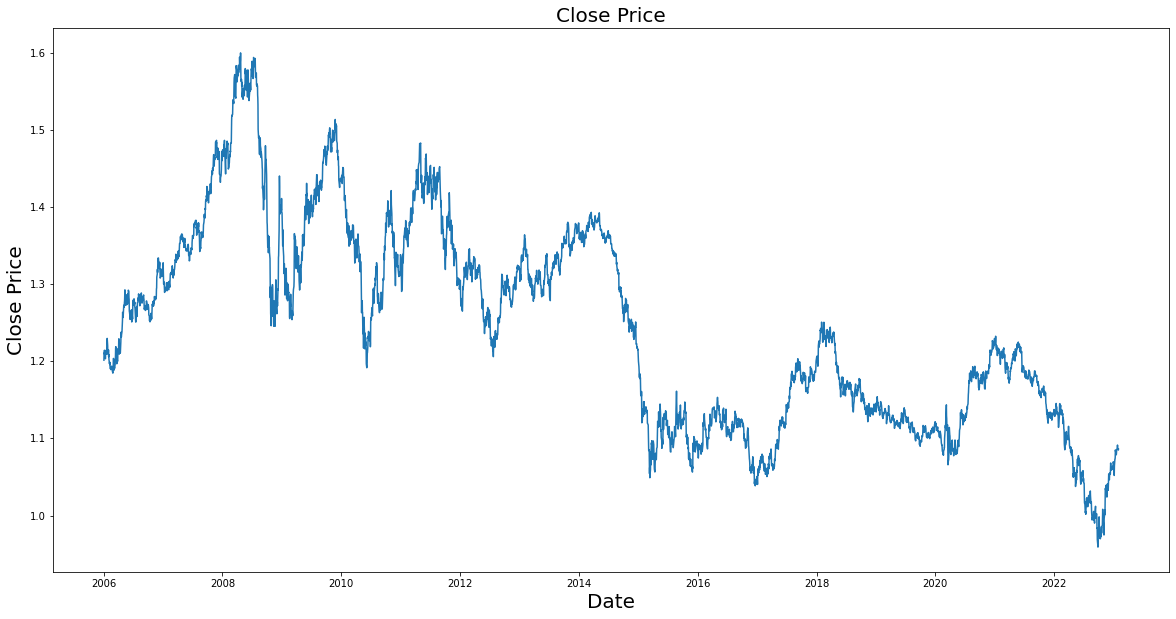

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Close Price', fontsize=20)
plt.plot(df['CLOSE'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=20)
plt.show()

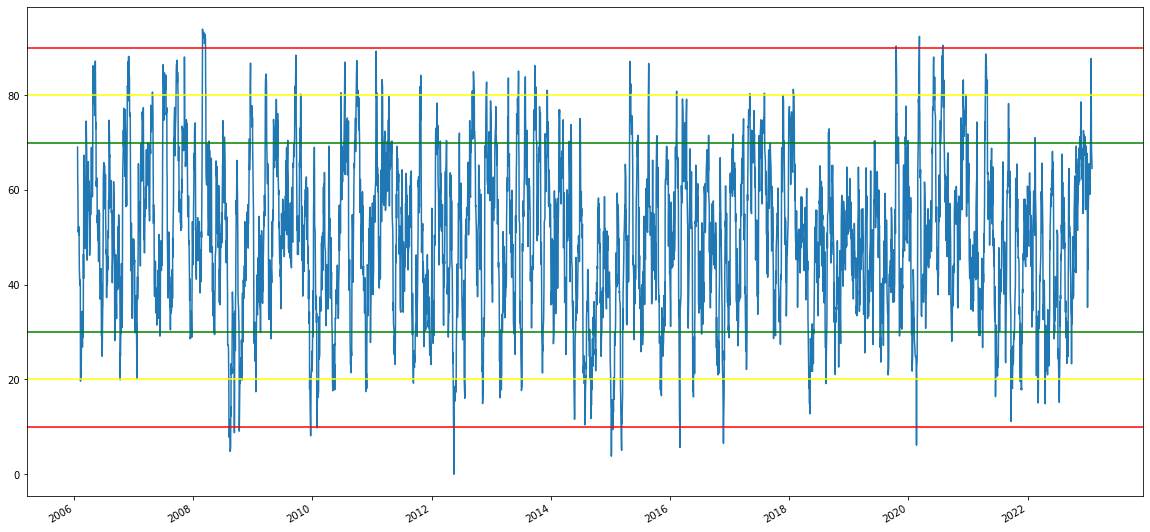

In [ ]:
delta = df['CLOSE'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down>0] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100 - (100 / (1 + RS))

# Plot the RSI if Overbought or Oversold
fig, ax = plt.subplots(1,1,figsize=(20, 10))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')